# Assignment 1
Hacktiv8 Sesi ke-8
Mission :
Do data visualization to London Crime Dataset and present :
1. Area plot
2. Histogram
3. Bar chart
4. Pie chart
5. Box plot
6. Scatter plot
7. Wordcloud

*Note : because the size of dataset file is too, I cant push it to Github. So I will put the link below
**London Crimes Dataset** : 
https://www.kaggle.com/datasets/jboysen/london-crime?select=london_crime_by_lsoa.csv


In [69]:
# import numpy and pandas library
import numpy as np
import pandas as pd

## PREPROCESSING

In [70]:
# read the dataset
df = pd.read_csv('london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [71]:
# see the information of dataset
df.info(verbose=True,null_counts=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14172\4215793887.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True,null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   lsoa_code       13490604 non-null  object
 1   borough         13490604 non-null  object
 2   major_category  13490604 non-null  object
 3   minor_category  13490604 non-null  object
 4   value           13490604 non-null  int64 
 5   year            13490604 non-null  int64 
 6   month           13490604 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


### Cleansing
from the info of dataset, there's no null value in dataset

In [72]:
# delete useless column 
kol = ['lsoa_code']
df.drop(kol,axis=1,inplace=True)

In [73]:
# check if there is null value in data frame
df.isnull().any()

borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

## EDA

In [74]:
# see top 5 from dataframe
df.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


In [75]:
col = ['major_category','value','year']
# make dataframe with major_category, value and year columns
df_major = df.loc[:,col]
df_major.head()

,major_category,value,year
0,Burglary,0,2016
1,Violence Against the Person,0,2016
2,Violence Against the Person,0,2015
3,Burglary,0,2016
4,Robbery,0,2008


In [76]:
# grouping and sum value column
df_major = df_major.groupby(['year','major_category'],as_index=False)['value'].sum()
df_major.head()

,year,major_category,value
0,2008,Burglary,88092
1,2008,Criminal Damage,91872
2,2008,Drugs,68804
3,2008,Fraud or Forgery,5325
4,2008,Other Notifiable Offences,10112


In [77]:
# make year column to be index
df_major.set_index('year',inplace=True)
df_major.head()

,major_category,value
year,,
2008,Burglary,88092
2008,Criminal Damage,91872
2008,Drugs,68804
2008,Fraud or Forgery,5325
2008,Other Notifiable Offences,10112


In [78]:
# make a readable dataframe
df_major = df_major.pivot_table(values='value',
                                index=df_major.index,
                                columns='major_category')

In [79]:
df_major.head()

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014


In [80]:
# delete some index and columns
df_major.drop(index=[2008,2009,2010],
                   columns=['Fraud or Forgery','Sexual Offences'],
                   inplace=True)

In [81]:
df_major

major_category,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person
year,,,,,,,
2011,93315,70914,57550,10264,36679,309292,146901
2012,93392,62158,51776,10675,35260,334054,150014
2013,87222,56206,50278,10811,29337,306372,146181
2014,76053,59279,44435,13037,22150,279880,185349
2015,70489,62976,39785,14229,21383,284022,218740
2016,68285,64071,38914,15809,22528,294133,232381


In [82]:
# import library matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

# styling
mpl.style.use(['ggplot'])

### AREA PLOT

**Question 1** : What is the number of major category from 2011 to 2016?

Text(0, 0.5, 'Value')

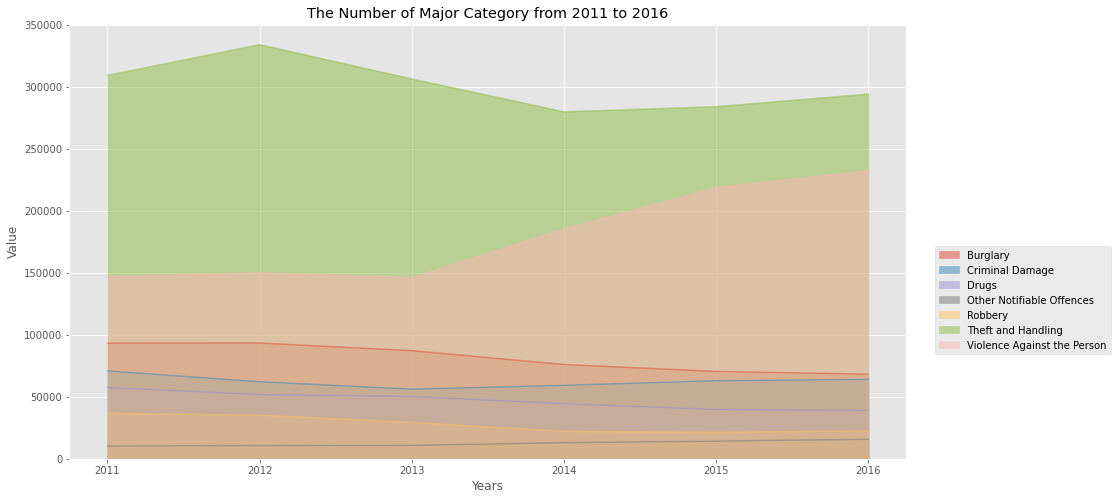

In [83]:
df_major.plot(figsize=(15,8),
              kind='area',
              stacked=False);

plt.legend(bbox_to_anchor=(1.25,0.5))
plt.title('The Number of Major Category from 2011 to 2016')
plt.xlabel('Years')
plt.ylabel('Value')

## BAR PLOT & PIE PLOT

In [84]:
# make dataframe with major_category and value columns
col = ['major_category','value']
df_major_total = df.loc[:,col].groupby('major_category',as_index=False)['value'].sum()
df_major_total

,major_category,value
0,Burglary,754293
1,Criminal Damage,630938
2,Drugs,470765
3,Fraud or Forgery,5325
4,Other Notifiable Offences,106349
5,Robbery,258873
6,Sexual Offences,1273
7,Theft and Handling,2661861
8,Violence Against the Person,1558081


In [85]:
# set index
df_major_total.set_index('major_category',inplace=True)
df_major_total

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


In [86]:
# transpose
df_major_total = df_major_total.T
df_major_total

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
value,754293,630938,470765,5325,106349,258873,1273,2661861,1558081


In [87]:
# make a new column to sum bottom 3 of crimes number
df_major_total['Other Offences'] = df_major_total['Fraud or Forgery'] + df_major_total['Sexual Offences'] + df_major_total['Other Notifiable Offences']
df_major_total.drop(columns=['Fraud or Forgery','Sexual Offences','Other Notifiable Offences'],inplace=True)

**Question 2** : How many crimes in london vary by Major Category?

### BAR PLOT

Text(0.5, 0, 'Total')

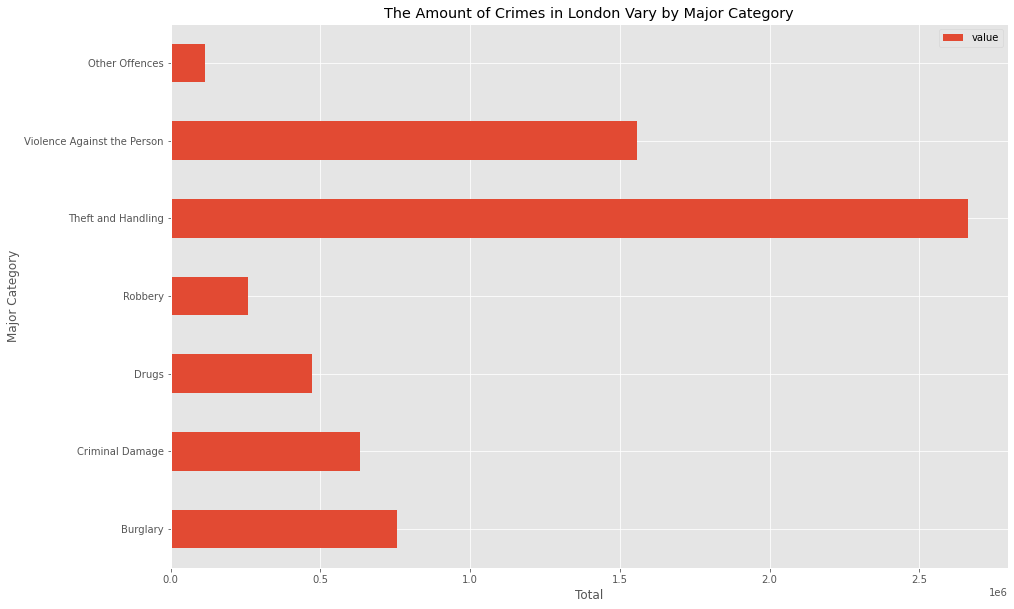

In [88]:
# make bar plot from df_major_total
df_major_total.T.plot(kind='barh',
                    figsize=(15,10));

plt.title('The Amount of Crimes in London Vary by Major Category')
plt.ylabel('Major Category')
plt.xlabel('Total')

**Summary** :
When viewed from the bar plot above, Theft and Handling and Violence Against the Person occupies the highest number of crimes consecutively reaching more than 1,500,000. While the rest of the other crime categories reached less than 1,000,000.

### PIE PLOT

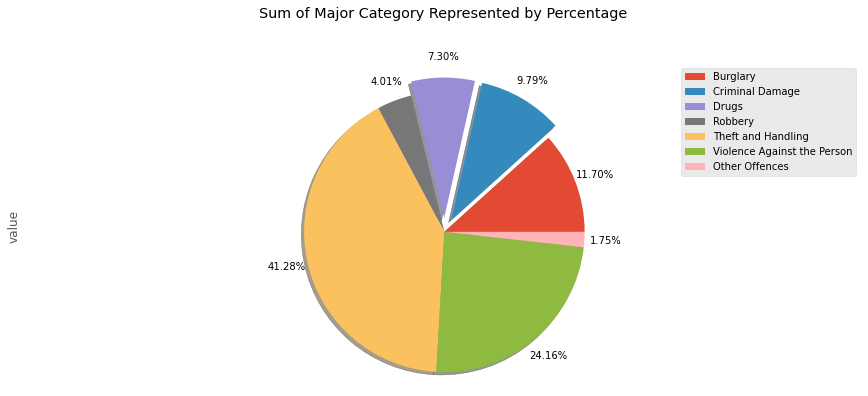

In [120]:
# make pie plot from df_major_total
explode_list = [0,0.1,0.1,0,0,0,0]
df_major_total.T['value'].plot(kind='pie',
                             figsize=(15,6),
                             autopct='%.2f%%',
                             labels=None,
                             shadow=True,
                             pctdistance=1.15,
                             explode=explode_list);

plt.legend(labels=df_major_total.T.index)
plt.title('Sum of Major Category Represented by Percentage',y=1.12)
plt.axis('equal');

**Summary** :
It has a same data with bar plot, so it has a same summary.

## HISTOGRAM

In [90]:
df.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


In [91]:
# make a dataframe that include borough, year, value
col = ['borough','year','value']
df_borough_hist = df.loc[:,col]
df_borough_hist.head()

,borough,year,value
0,Croydon,2016,0
1,Greenwich,2016,0
2,Bromley,2015,0
3,Redbridge,2016,0
4,Wandsworth,2008,0


In [92]:
# grouping the borough and year column and sum the value column
df_borough_hist = df_borough_hist.groupby(['borough','year'],as_index=False)['value'].sum()
df_borough_hist.head()

,borough,year,value
0,Barking and Dagenham,2008,17656
1,Barking and Dagenham,2009,17713
2,Barking and Dagenham,2010,17130
3,Barking and Dagenham,2011,16686
4,Barking and Dagenham,2012,15990


In [93]:
# make a readable dataframe
df_borough_hist=df_borough_hist.pivot_table(values='value',
                                            index=df_borough_hist['borough'],
                                            columns=df_borough_hist['year'])

df_borough_hist.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


In [94]:
# make a Total column that represent the sum of crimes in each borough in London
df_borough_hist['Total'] = df_borough_hist.sum(axis=1)

In [95]:
# showing top 3 borough with most crimes
df_borough_hist.sort_values(by='Total',ascending=False,inplace=True)
df_borough_hist = df_borough_hist.head(3)
df_borough_hist

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809


In [96]:
# delete Total column
df_borough_hist.drop(columns='Total',inplace=True)

In [97]:
# numpy
count, bin_edges = np.histogram(df_borough_hist,15)
print(count)
print(bin_edges)

[5 8 5 0 0 0 0 0 0 6 0 0 2 0 1]
[28912.         30932.93333333 32953.86666667 34974.8
 36995.73333333 39016.66666667 41037.6        43058.53333333
 45079.46666667 47100.4        49121.33333333 51142.26666667
 53163.2        55184.13333333 57205.06666667 59226.        ]


**Question 3** : How offences spread in Westminster, Lambeth and Southwark?

Text(0, 0.5, 'Number of Years')

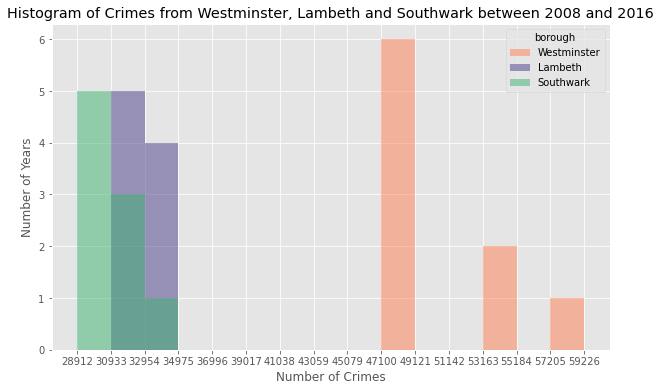

In [98]:
# make a histogram from df_borough_hist
df_borough_hist.T.plot(kind='hist',
                        figsize=(10,6),
                        bins=15,
                        alpha=0.5,
                        xticks=bin_edges,
                        color=['coral','darkslateblue','mediumseagreen']);

plt.title('Histogram of Crimes from Westminster, Lambeth and Southwark between 2008 and 2016')
plt.xlabel('Number of Crimes')
plt.ylabel('Number of Years')

**Summary** :
If we look at the histogram above, it can be concluded that Westminster has data that is much different from the other 2 borough where they have data that are not much different from each other.

## WORDCLOUD

In [99]:
# import library wordcloud
from wordcloud import WordCloud, STOPWORDS

In [100]:
# make a new dataframe to build a wordcloud
df_wordcloud = df.loc[:,['borough','value','year']]
df_wordcloud.head()

,borough,value,year
0,Croydon,0,2016
1,Greenwich,0,2016
2,Bromley,0,2015
3,Redbridge,0,2016
4,Wandsworth,0,2008


In [101]:
# grouping borough and year columns and then sum the value column
df_wordcloud = df_wordcloud.groupby(['borough','year'],as_index=False)['value'].sum()
df_wordcloud.head()

,borough,year,value
0,Barking and Dagenham,2008,17656
1,Barking and Dagenham,2009,17713
2,Barking and Dagenham,2010,17130
3,Barking and Dagenham,2011,16686
4,Barking and Dagenham,2012,15990


In [102]:
# build a readable dataframe
df_wordcloud = df_wordcloud.pivot_table(values='value',
                                        index='borough',
                                        columns='year')

df_wordcloud

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
City of London,0,0,0,69,157,110,115,151,178
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127


In [103]:
# make a Total column
df_wordcloud['Total'] = df_wordcloud.sum(axis=1)
df_wordcloud.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


In [104]:
total_crimes = df_wordcloud['Total'].sum()
total_crimes

6447758

In [105]:
# make a generate text
max_words = 90
word_string = ''
for area in df_wordcloud.index.values:
    # check if country's name is a single-word name
    if len(area.split(' ')) == 1:
        repeat_num_times = int(df_wordcloud.loc[area,'Total']/float(total_crimes)*max_words)
        word_string = word_string + ((area + ' ') * repeat_num_times)

# display the generated text
word_string

'Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Croydon Croydon Croydon Ealing Ealing Ealing Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Haringey Haringey Harrow Havering Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Redbridge Redbridge Southwark Southwark Southwark Sutton Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster '

In [106]:
# create the word cloud
wd = WordCloud(background_color='white').generate(word_string)

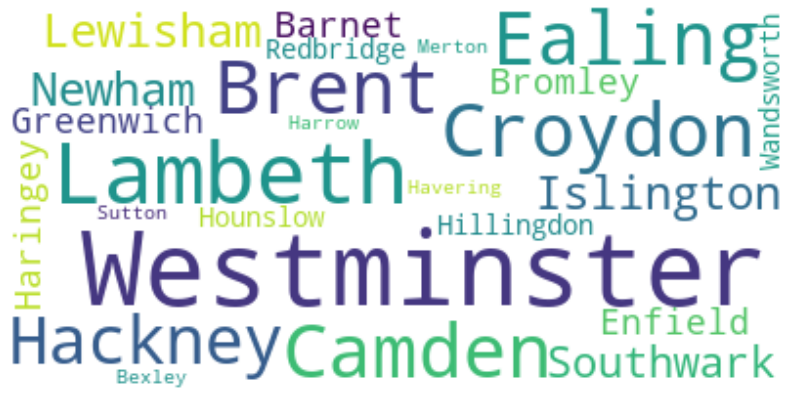

In [107]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wd, interpolation='bilinear')
plt.axis('off')
plt.show()

## SCATTER PLOT

In [108]:
# make a new dataframe for scatter plot
df_scatter = df.loc[:,['year','value']]
df_scatter.head()

,year,value
0,2016,0
1,2016,0
2,2015,0
3,2016,0
4,2008,0


In [109]:
# make a readable dataframe
df_scatter = df_scatter.groupby('year',as_index=False)['value'].sum()
df_scatter

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


Text(0, 0.5, 'Number of Crimes')

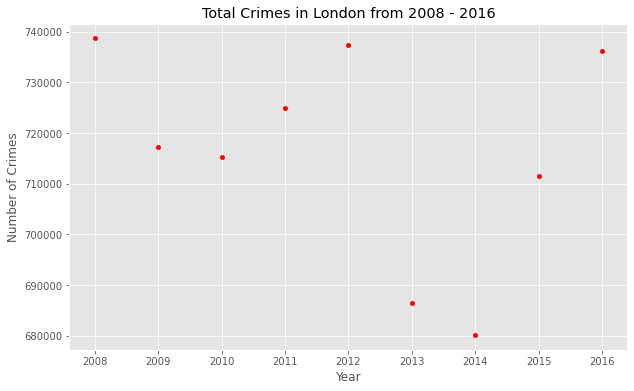

In [110]:
# make a scatter plot from df_scatter
df_scatter.plot(kind='scatter',
                x='year',
                y='value',
                figsize=(10,6),
                color='red')

plt.title('Total Crimes in London from 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

**Summary** : 
If you look at the scatter plot above, you don't see certain patterns. The data seen above can be concluded that there have been several fluctuations related to the number of crimes in London from 2008 - 2016

## BOX PLOT

In [112]:
# make a dataframe to build box plot
df_box = df_borough_hist.head(2).T
df_box

borough,Westminster,Lambeth
year,,
2008,47846,31717
2009,48456,31225
2010,48116,31671
2011,54243,33224
2012,59226,33473
2013,53852,31868
2014,47564,31765
2015,47395,33164
2016,48330,34071


In [113]:
# see the percentages associated with both borough
df_box.describe()

borough,Westminster,Lambeth
count,9.000000,9.000000
mean,50558.666667,32464.222222
std,4201.683918,1014.515005
min,47395.000000,31225.000000
25%,47846.000000,31717.000000
50%,48330.000000,31868.000000
75%,53852.000000,33224.000000
max,59226.000000,34071.000000


Text(0, 0.5, 'Number of Crimes')

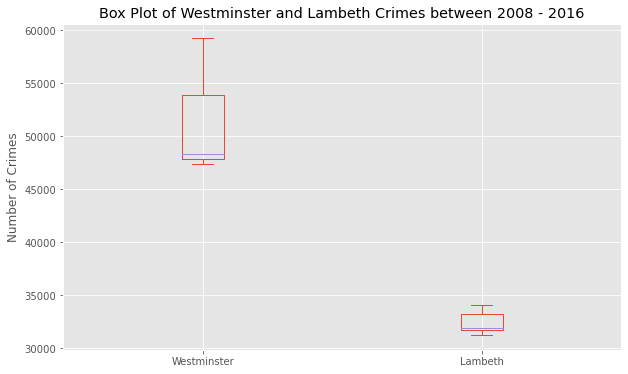

In [115]:
# make a box plot from df_box
df_box.plot(kind='box',
            figsize=(10,6))

plt.title('Box Plot of Westminster and Lambeth Crimes between 2008 - 2016')
plt.ylabel('Number of Crimes')


**Summary** :
When viewed from the box plot above, the difference in the number of crimes is very far. The difference is more than 10,000. It can be seen from the lows of Westminster and the highs of Lambeth which are separated by around 15,000. So it can be concluded that Westminster has a fairly high crime rate.
